In [1]:
import csv
from matplotlib import pyplot as plt
from scipy.optimize import linprog
import numpy as np

In [2]:
data = []
eps = 1e-4 * 1.1

In [3]:
with open('data/Ch1.txt') as file:
    a, b = file.readline().split(' ')
    w = [float(line) for line in file]

[array([4.88555556e-05, 2.88617176e-02]), array([5.16666667e-05, 2.85102824e-02]), array([5.12293578e-05, 2.85168420e-02]), array([5.12065217e-05, 2.86501306e-02])]
[0.038872 0.      ]
[0.03384759259999998, 0.028373162044444438, 0.08017694906666545] [0.03371662184954128, 0.027993615733333373, 0.07771727315555547]
0.03378210722477063
6.54853752293516e-05
0.028183388888888904
0.00018977315555553272
0.07894711111111047
0.0012298379555549868


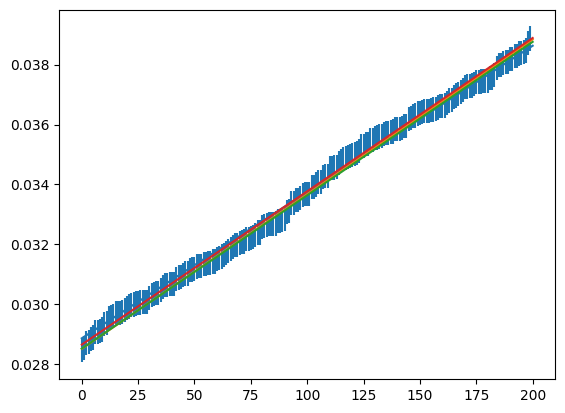

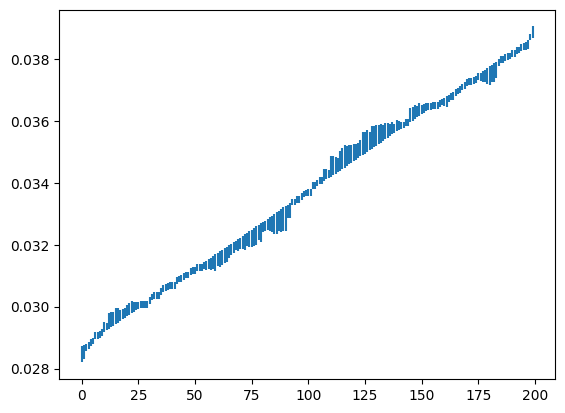

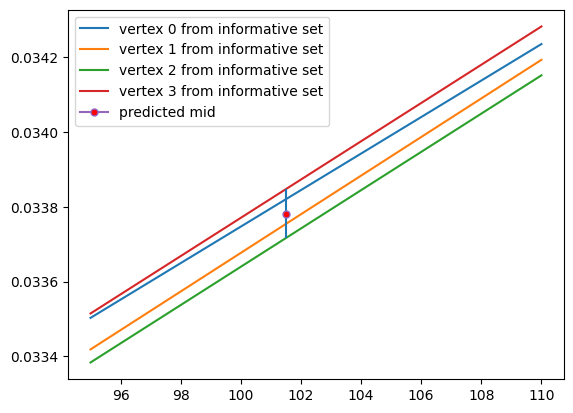

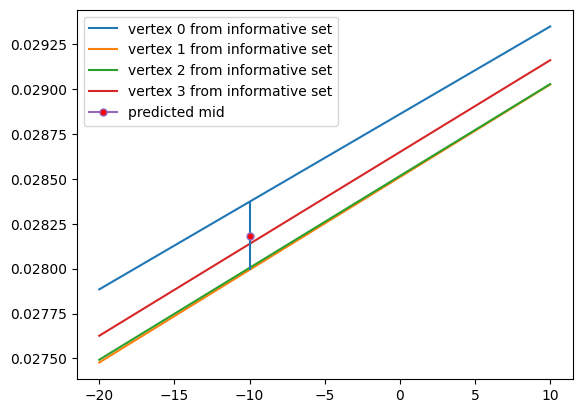

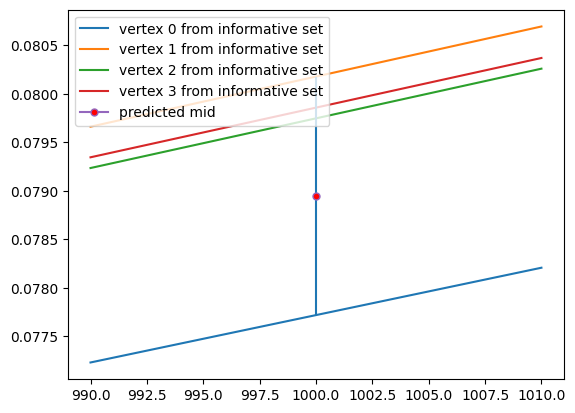

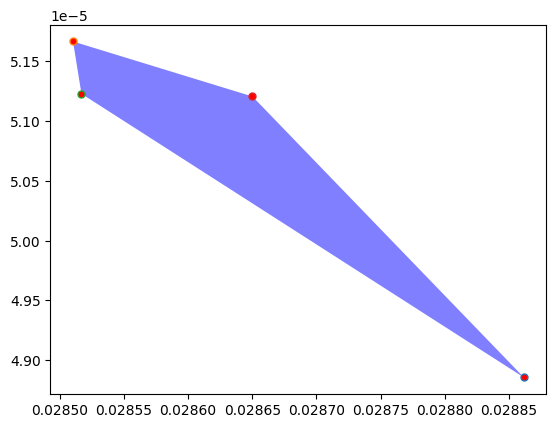

In [4]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

max_l_w = max(w)

y = []
x = []
with open('data/data1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    i = 0
    for line_count, row in enumerate(csv_reader):
        if line_count != 0:
            data.append([float(row[0]) - eps * max_l_w, float(row[0]) + eps * max_l_w])
            ax1.vlines(i, data[-1][0], data[-1][1])
            ax2.vlines(i, float(row[0]) - eps * w[i], float(row[0]) + eps * w[i])
            y.append(float(row[0]))
            x.append(i)
            i += 1

v = []
for i in range(len(x)):
    for j in range(i + 1, len(x)):
        px1 = [x[i], x[j]]
        py1 = [data[i][0], data[j][0]] 
        
        px2 = [x[i], x[j]]
        py2 = [data[i][0], data[j][1]] 

        px3 = [x[i], x[j]]
        py3 = [data[i][1], data[j][0]] 

        px4 = [x[i], x[j]]
        py4 = [data[i][1], data[j][1]] 

        c1 = np.polyfit(px1, py1, 1)
        c2 = np.polyfit(px2, py2, 1)
        c3 = np.polyfit(px3, py3, 1)
        c4 = np.polyfit(px4, py4, 1)

        isIn1 = True
        isIn2 = True
        isIn3 = True
        isIn4 = True
        for k in x:
            t = c1[1] + c1[0] * k
            if isIn1 and (t < data[k][0] or t > data[k][1]):
                isIn1 = False

            t = c2[1] + c2[0] * k
            if isIn2 and (t < data[k][0] or t > data[k][1]):
                isIn2 = False

            t = c3[1] + c3[0] * k
            if isIn3 and (t < data[k][0] or t > data[k][1]):
                isIn3 = False

            t = c4[1] + c4[0] * k
            if isIn4 and (t < data[k][0] or t > data[k][1]):
                isIn4 = False

        if isIn1:
            v.append(c1)

        if isIn2:
            v.append(c2)

        if isIn3:
            v.append(c3)

        if isIn4:
            v.append(c4)

print(v)

obj = [1 for _ in range(len(x) + 2)]
obj[0] = 0
obj[1] = 0
bnd = [(0, float("inf")) for _ in range(len(x) + 2)]
bnd[0] = (float("-inf"), float("inf"))
bnd[1] = (float("-inf"), float("inf"))
lhs_ineq = []
rhs_ineq = []

for k in x:
    coefs = [0 for _ in range(len(x) + 2)]
    coefs[0] = 1
    coefs[1] = k
    coefs[k + 2] = -1
    lhs_ineq.append(coefs)
    rhs_ineq.append(y[k])
    coefs[0] = -1
    coefs[1] = -k
    coefs[k + 2] = -1
    lhs_ineq.append(coefs)
    rhs_ineq.append(-y[k])

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="highs")
print(opt.x[:2])

for tmp in v:
    polynomial = np.poly1d(tmp)
    x_axis = np.linspace(0,200,10)
    y_axis = polynomial(x_axis)
    ax1.plot(x_axis, y_axis)

max_l = []
min_l = []
vals = []
for tmp in v:
    polynomial = np.poly1d(tmp)
    vals.append(polynomial(101.5))
max_l.append(np.max(vals))
min_l.append(np.min(vals))

vals = []
for tmp in v:
    polynomial = np.poly1d(tmp)
    vals.append(polynomial(-10))
max_l.append(np.max(vals))
min_l.append(np.min(vals))

vals = []
for tmp in v:
    polynomial = np.poly1d(tmp)
    vals.append(polynomial(1000))
max_l.append(np.max(vals))
min_l.append(np.min(vals))

plt.figure()
i = 0
for tmp in v:
    polynomial = np.poly1d(tmp)
    x_axis = np.linspace(95,110,5)
    y_axis = polynomial(x_axis)
    plt.plot(x_axis, y_axis, label=f"vertex {i} from informative set")
    i += 1

plt.vlines(101.5, min_l[0], max_l[0])
plt.plot(101.5, (min_l[0] + max_l[0]) / 2, marker="o", markersize=5, markerfacecolor="red", label="predicted mid")
plt.legend(loc='upper left')

plt.figure()
i = 0
for tmp in v:
    polynomial = np.poly1d(tmp)
    x_axis = np.linspace(-20,10,5)
    y_axis = polynomial(x_axis)
    plt.plot(x_axis, y_axis, label=f"vertex {i} from informative set")
    i += 1

plt.vlines(-10, min_l[1], max_l[1])
plt.plot(-10, (min_l[1] + max_l[1]) / 2, marker="o", markersize=5, markerfacecolor="red", label="predicted mid")
plt.legend(loc='upper left')

i = 0
plt.figure()
for tmp in v:
    polynomial = np.poly1d(tmp)
    x_axis = np.linspace(990,1010,5)
    y_axis = polynomial(x_axis)
    plt.plot(x_axis, y_axis, label=f"vertex {i} from informative set")
    i += 1

plt.vlines(1000, min_l[2], max_l[2])
plt.plot(1000, (min_l[2] + max_l[2]) / 2, marker="o", markersize=5, markerfacecolor="red", label="predicted mid")
plt.legend(loc='upper left')

print(max_l, min_l)
for m, l in zip(max_l, min_l):
    print((m + l) / 2)
    print((m - l) / 2)

plt.figure()

x, y = [], []
for tmp in v:
    x.append(tmp[1])
    y.append(tmp[0])
    plt.plot(tmp[1], tmp[0], marker="o", markersize=5, markerfacecolor="red")
x, y = np.array(x), np.array(y)
order = np.argsort(np.arctan2(y - y.mean(), x - x.mean()))
plt.fill(x[order], y[order], "b", alpha=0.5)

plt.show()